#  Principal Component Analysis (PCA) Tutorial
Followed from: [link](https://www.python-course.eu/principal_component_analysis.php)

- PCA is about finding the principal components (PCs) of a dataset.
- The principal components of a dataset are the directions that hold the most variation of the dataset.
- The first prinicipal component has the highest variation.
- The PCs help to reduce the dimensions or the size of the data without losing much information.

## Steps
1. Collect the data.
2. Normalize the data.
3. Calculate the covariance matrix.
4. Find the eigenvalues and eigenvectors of the covariance matrix.
5. Use the principal components to transform the data or reduce the dimensionality of the data.

In [2]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd

In [4]:
%matplotlib inline
style.use("seaborn")

##  Step 1: Collect the data

In [5]:
df = pd.read_table('data/wine.data',sep=',', names=['Alcohol','Malic_acid','Ash','Alcalinity of ash','Magnesium','Total phenols',
                                                 'Flavanoids','Nonflavanoid_phenols','Proanthocyanins','Color_intensity','Hue',
                                                 'OD280/OD315_of_diluted_wines','Proline'])
target = df.index

##  Step 2: Normalize the data

In [9]:
df = StandardScaler().fit_transform(df)

/home/bbrighttaer/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bbrighttaer/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


## Step 3: Calculate the covariance matrix
The dataframe is transposed because the documentation of np.cov() says the rows are the variable/features wheras the columns are the data instances/samples

In [10]:
COV = np.cov(df.T)

##  Step 4: Find the eigenvalues and eigenvectors of the covariance matrix.

In [11]:
eigval, eigvec = np.linalg.eig(COV)

In [13]:
print(np.cumsum([i*(100/sum(eigval)) for i in eigval]))

[ 36.1988481   55.40633836  66.52996889  73.59899908  80.16229276
  85.09811607  89.3367954   90.13201029  92.81275924  94.11099181
  96.33314522  98.06998091 100.        ]


## Step 5: Use the principal components to transform the data or reduce the dimensionality of the data.

In [14]:
# We keep the two eigenvectors with highest eigenvalues
PC = eigvec.T[0:2]

In [21]:
data_transformed = np.dot(df, PC.T) # PC is transposed because its shape is (2, 13)

In [22]:
data_transformed.shape

(178, 2)

In [23]:
PC

array([[-0.1443294 ,  0.24518758,  0.00205106,  0.23932041, -0.14199204,
        -0.39466085, -0.4229343 ,  0.2985331 , -0.31342949,  0.0886167 ,
        -0.29671456, -0.37616741, -0.28675223],
       [ 0.48365155,  0.22493093,  0.31606881, -0.0105905 ,  0.299634  ,
         0.06503951, -0.00335981,  0.02877949,  0.03930172,  0.52999567,
        -0.27923515, -0.16449619,  0.36490283]])

##  Visualization

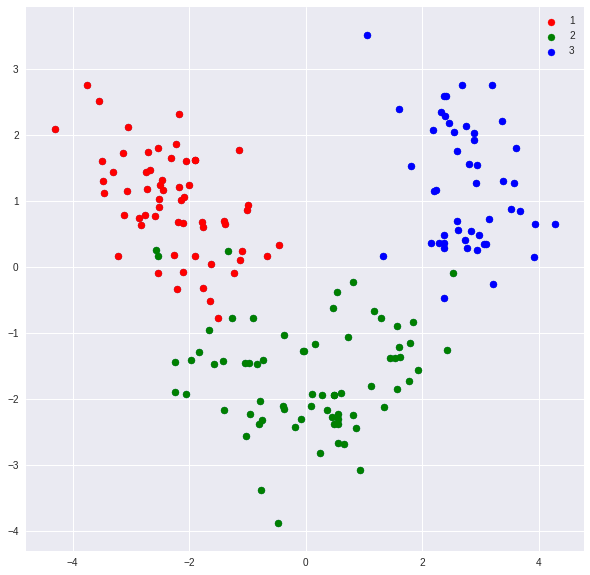

In [27]:
fig = plt.figure(figsize=(10,10))
ax0 = plt.subplot(111)
ax0.scatter(data_transformed.T[0], data_transformed.T[1])
for l, c in zip((np.unique(target)), ['red','green','blue']):
    ax0.scatter(data_transformed.T[0, target==l], data_transformed.T[1, target==l], c=c, label=l)
ax0.legend()
plt.show()

#  PCA using sklearn

In [28]:
from sklearn.decomposition import PCA

In [29]:
PCA_model = PCA(n_components=2, random_state=42)
data_transformed = PCA_model.fit_transform(df, target)*(-1)

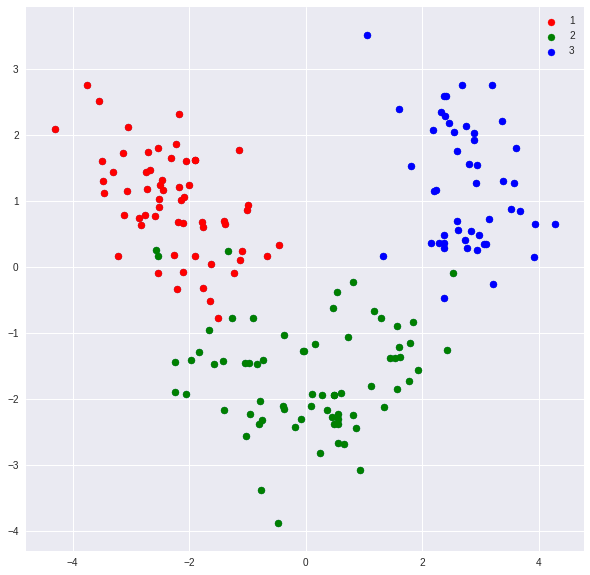

In [30]:
fig = plt.figure(figsize=(10,10))
ax0 = plt.subplot(111)
ax0.scatter(data_transformed.T[0], data_transformed.T[1])
for l, c in zip((np.unique(target)), ['red','green','blue']):
    ax0.scatter(data_transformed.T[0, target==l], data_transformed.T[1, target==l], c=c, label=l)
ax0.legend()
plt.show()